<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа» - Множественное тестирование</b></h3>


## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy import stats

sns.set_context("paper")
warnings.filterwarnings('ignore')

## Импорт данных

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, опираясь уже **НЕ** только на визуализацию. Само задание выполнить на языке **Python**.


# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить (drop_duplicates). 
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (dropna())
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Сколько их?

In [3]:
data.duplicated().sum()

0

Дублей нет.

In [4]:
data.isnull().sum()

was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64

Пропуски есть в колонке drive_info.

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

was_married    0
children       0
salary         0
sex            0
age            0
profession     0
home_cost      0
drive_info     0
happyness      0
dtype: int64

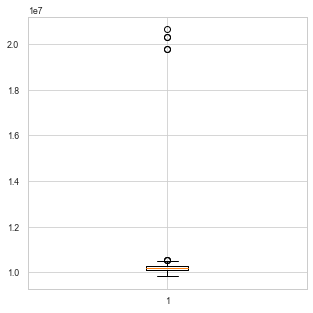

In [7]:
plt.figure(figsize=(5, 5))
plt.boxplot(data['home_cost']);

In [8]:
q25 = data.home_cost.quantile(0.25)
q75 = data.home_cost.quantile(0.75)
iqr = q75 - q25
boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
is_outlier = (data.home_cost < boundaries[0]) | (data.home_cost > boundaries[1])
is_outlier.sum()

8

8 выбросов по признаку home_cost.

In [9]:
data.loc[data['home_cost'] < boundaries[0]] = np.nan
data.loc[data['home_cost'] > boundaries[1]] = np.nan
data.dropna(inplace=True)

In [10]:
q25 = data.home_cost.quantile(0.25)
q75 = data.home_cost.quantile(0.75)
iqr = q75 - q25
boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
is_outlier = (data.home_cost < boundaries[0]) | (data.home_cost > boundaries[1])
is_outlier.sum()

0

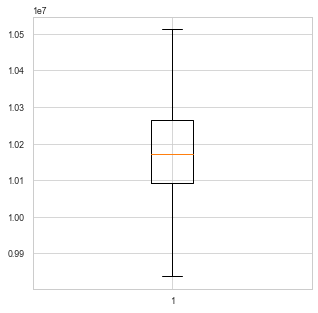

In [11]:
plt.figure(figsize=(5, 5))
plt.boxplot(data['home_cost']);

# Проверка гипотез

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

<div class="alert alert-info">

<b>Задание:</b>    
    
Перед вами уже знакомый датасет, который был дан в прошлых домашних заданиях. Вы уже научились применить подходящий статистический критерий для двух групп, теперь вам предстоит научиться верно применять критерии для нескольких групп одновременно. 
    

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием.

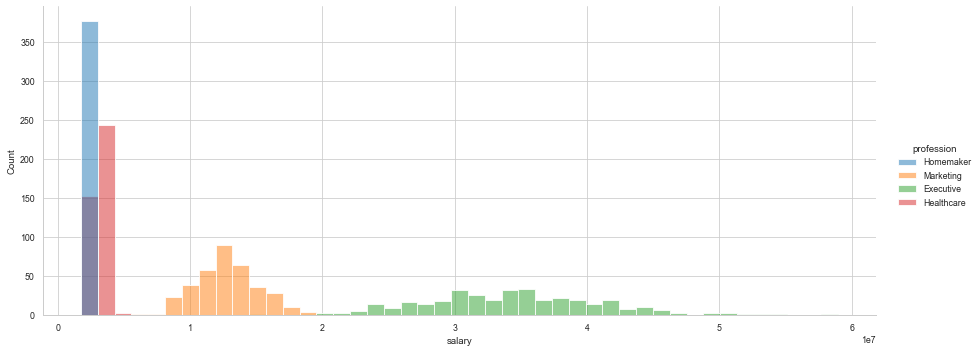

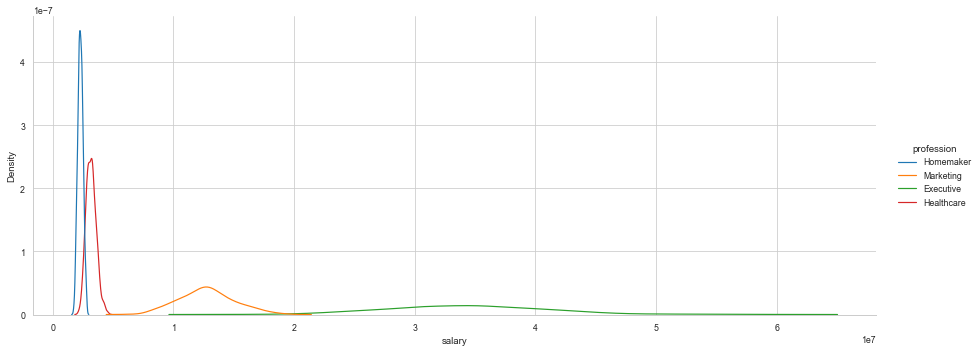

In [26]:
values = ['Homemaker', 'Marketing', 'Healthcare', 'Executive']

sns.displot(data[data.profession.isin(values)==True], x='salary', hue='profession', bins=45, height=5, aspect=2.5)
sns.displot(data[data.profession.isin(values)==True], x='salary', hue='profession', height=5, aspect=2.5, kind='kde')

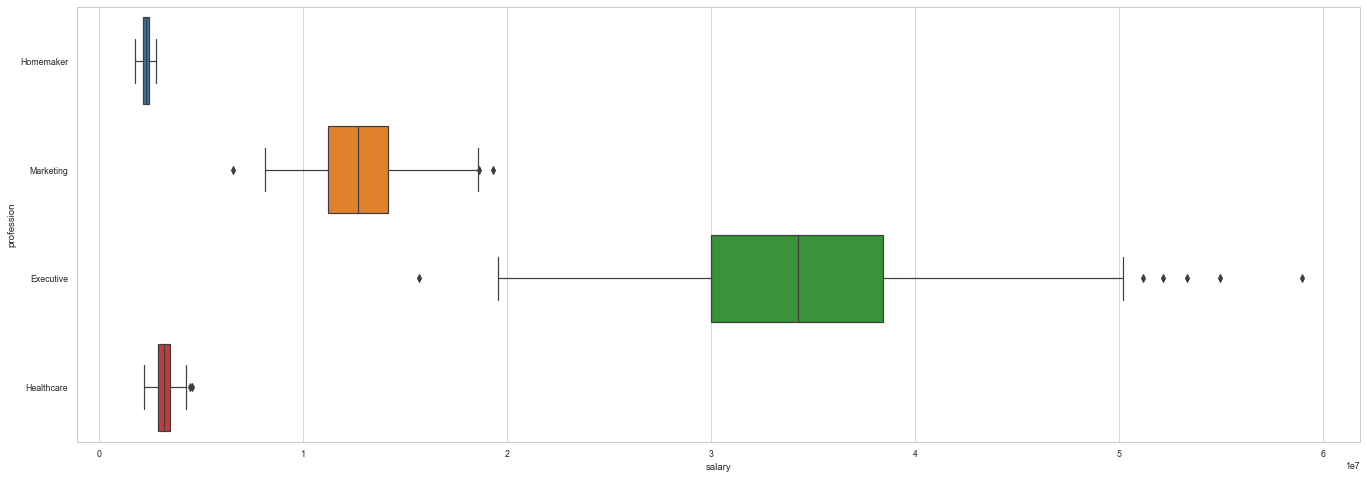

In [40]:
plt.figure(figsize=(23, 8))
sns.boxplot(data=data[data.profession.isin(values)==True], x='salary', y='profession');

Судя по графикам, зарплаты явно отличаются, потому возьмём дисперсионный анализ и подтвердим это.

In [44]:
# H0 – между представителями профессий Homemaker, Marketing, Healthcare и Executive зарплаты НЕ отличаются
# H1 – между представителями профессий Homemaker, Marketing, Healthcare и Executive зарплаты отличаются

Healthcare = data[data['profession'] == 'Healthcare']['salary'].values
Homemaker = data[data['profession'] == 'Homemaker']['salary'].values
Marketing = data[data['profession'] == 'Marketing']['salary'].values
Executive = data[data['profession'] == 'Executive']['salary'].values

st, p_value = stats.f_oneway(Healthcare, Homemaker, Marketing, Executive)

print("statistic = {}, p-value = {}".format(st, p_value))

alpha = 0.01
if p_value > alpha:
    print('Да, гипотеза верна, зарплаты между представителями профессий Homemaker, Marketing, Healthcare и Executive не отличаются')
else:
    print('Нет, гипотеза не верна, зарплаты между представителями профессий Homemaker, Marketing, Healthcare и Executive отличаются статически значимо')

statistic = 7084.33676088484, p-value = 0.0
Нет, гипотеза не верна, зарплаты между представителями профессий Homemaker, Marketing, Healthcare и Executive отличаются статически значимо


<div class="alert alert-warning">

* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием.

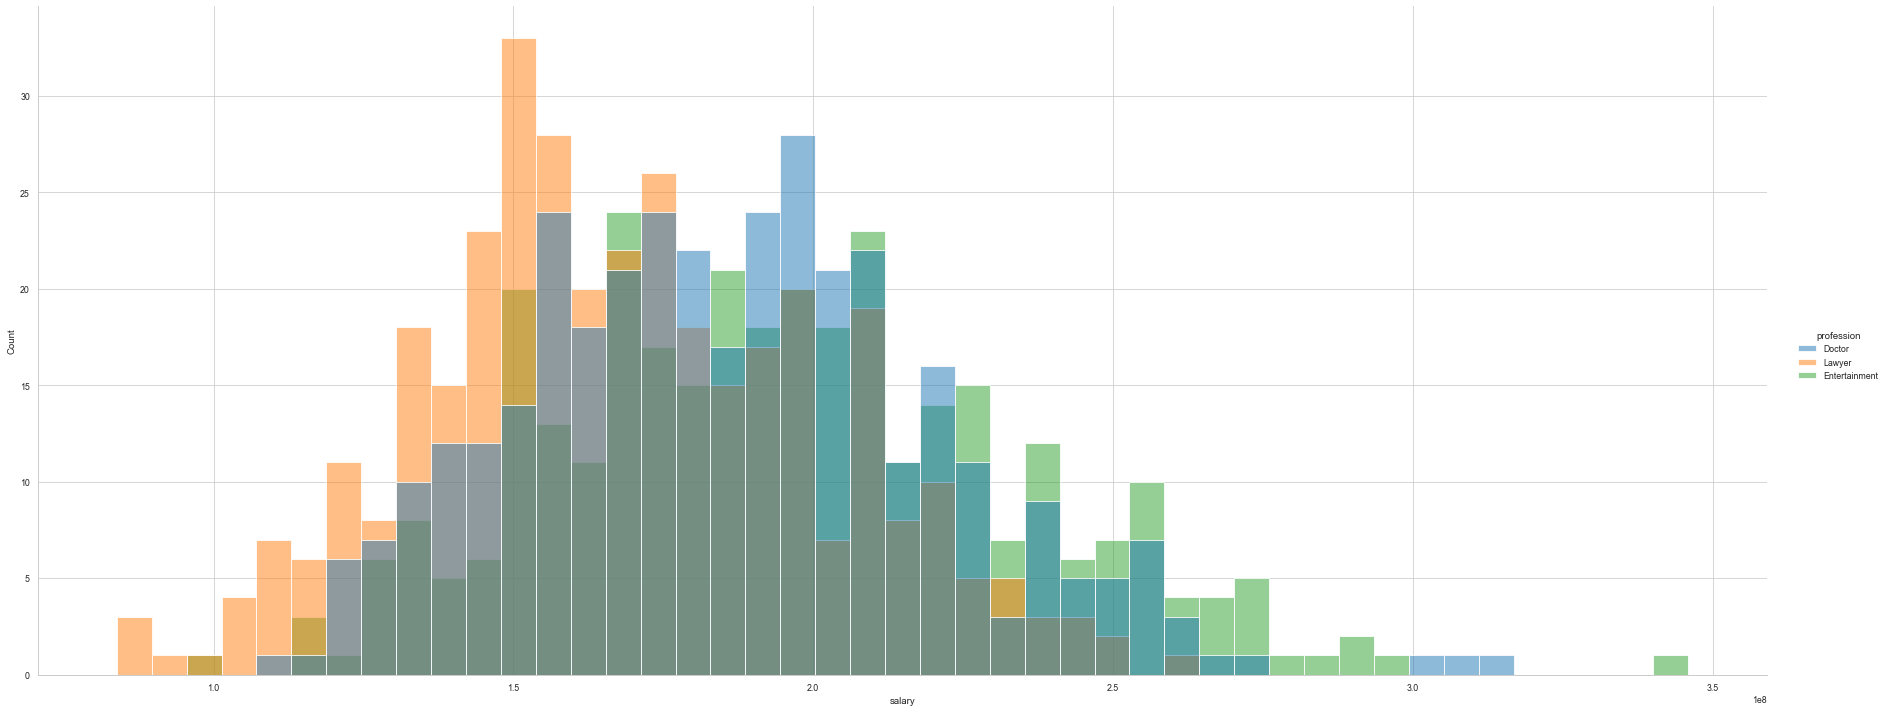

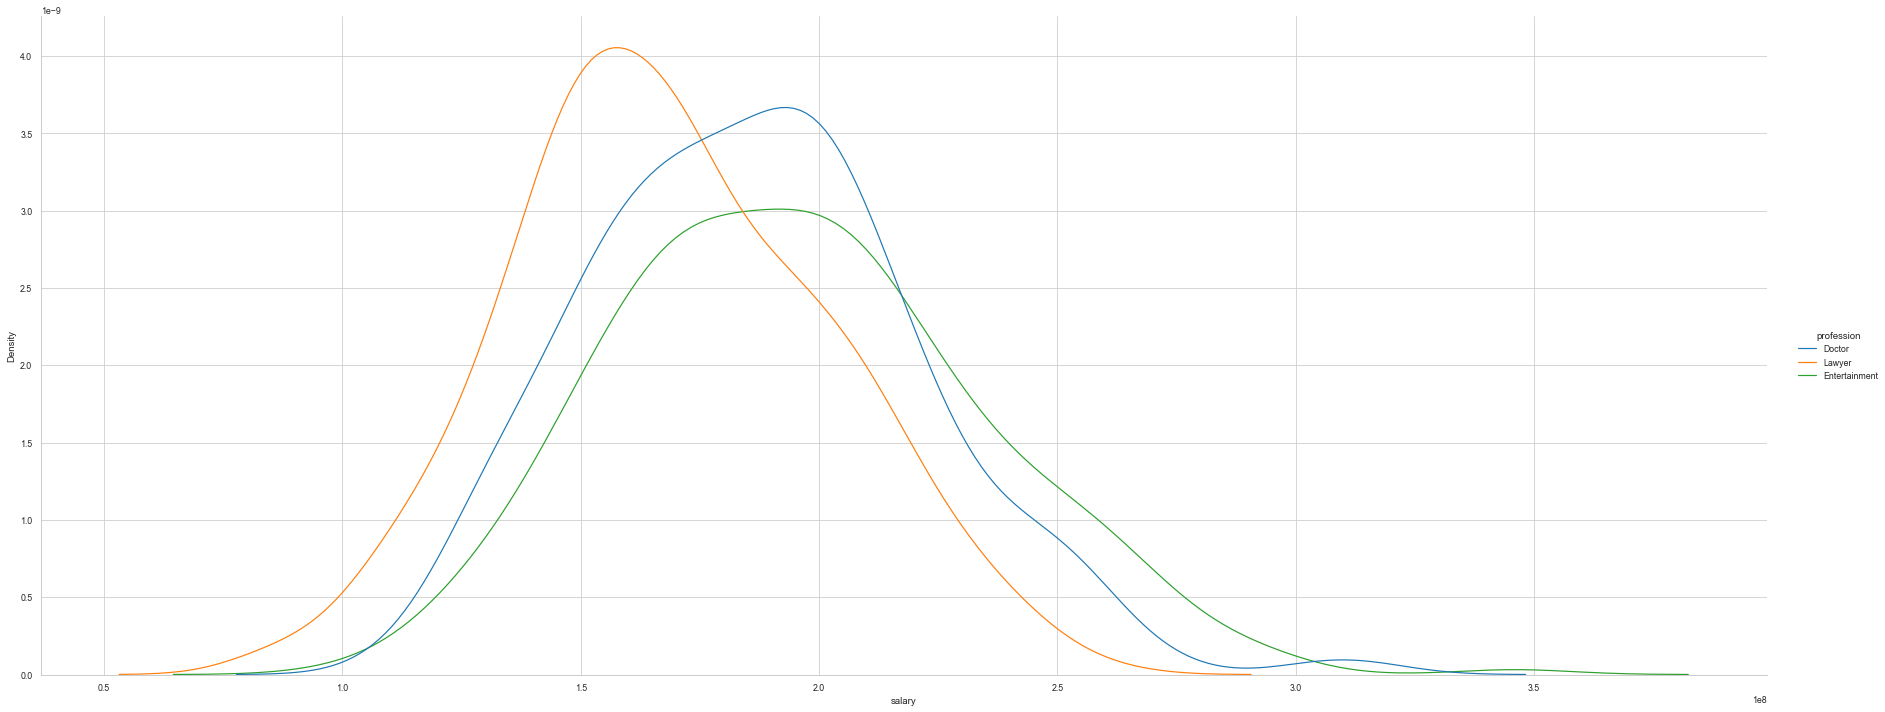

In [42]:
values = ['Doctor', 'Entertainment', 'Lawyer']
sns.displot(data[data.profession.isin(values)==True], x='salary', hue='profession', bins=45, height=10, aspect=2.5)
sns.displot(data[data.profession.isin(values)==True], x='salary', hue='profession', height=10, aspect=2.5, kind='kde')

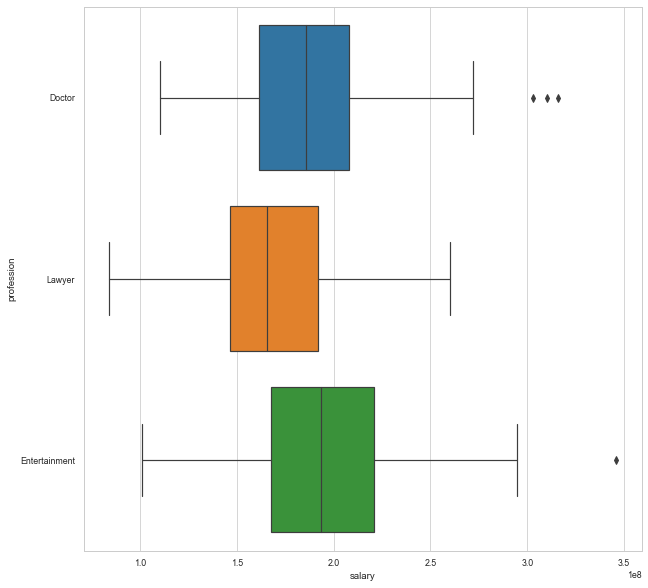

In [43]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data[data.profession.isin(values)==True], x='salary', y='profession');

Графики отличаются, но не явно. Потому воспользуемся критерием Крускала-Уоллиса.

In [53]:
# H0 – между представителями профессий Doctor, Entertainment и Lawyer зарплаты НЕ отличаются
# H1 - между представителями профессий Doctor, Entertainment и Lawyer зарплаты отличаются

Doctor = data[data['profession'] == 'Doctor']['salary'].values
Entertainment = data[data['profession'] == 'Entertainment']['salary'].values
Lawyer = data[data['profession'] == 'Lawyer']['salary'].values

st, p_value = stats.kruskal(Doctor, Entertainment, Lawyer)
print("statistic = {}, p-value = {}".format(st, p_value))

alpha = 0.01
if p_value > alpha:
    print('Да, гипотеза верна, зарплаты между представителями профессий Doctor, Entertainment и Lawyer не отличаются')
else:
    print('Нет, гипотеза не верна, зарплаты между представителями профессий Doctor, Entertainment и Lawyer отличаются статически значимо')

statistic = 87.66588261113975, p-value = 9.195925948681477e-20
Нет, гипотеза не верна, зарплаты между представителями профессий Doctor, Entertainment и Lawyer отличаются статически значимо


<div class="alert alert-warning">
    
Допустим вы рассматриваете 4 группы населения, отличающихся количеством  детей. Группы следующие.
* **A** - нет детей
* **B** - 1 ребенок
* **C** - от 2 до 4 детей
* **D** - от 5 детей    
    
    
Правда ли, что эти группы отличаются статистически значимо по уровню дохода и уровню счастья? Ответ поддержите статистическими критериями и визуализацией

Начнём с группировки — создадим критерии и добавим новую колонку в датасет.

In [18]:
conditions = [
    data['children'] == 0,
    data['children'] == 1,
    (data['children'] >= 2) & (data['children'] <= 4),
    data['children'] >= 5
]

choices = ['A', 'B', 'C', 'D']

data['children_label'] = np.select(conditions, choices)

In [19]:
data.head()

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness,children_label
id,,,,,,,,,,
1,1.0,2.0,1.737490e+08,1.0,32.0,Doctor,1.014051e+07,0.0,0.383234,C
5,1.0,3.0,2.474979e+06,0.0,21.0,Homemaker,1.001654e+07,1.0,0.326801,C
7,1.0,2.0,1.514086e+08,1.0,32.0,Doctor,1.022668e+07,1.0,0.404290,C
8,1.0,1.0,1.284116e+07,1.0,9.0,Marketing,1.017361e+07,1.0,0.335858,B
10,1.0,9.0,1.524378e+08,1.0,100.0,Artist,1.037684e+07,1.0,0.776220,D


In [20]:
# проверка функции на пустые значения
data.isnull().sum()

was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info        0
happyness         0
children_label    0
dtype: int64

Проверять гипотезу будем по отдельности — для уровня счастья и для уровня дохода. Начнём с графиков.

**Счастье:**

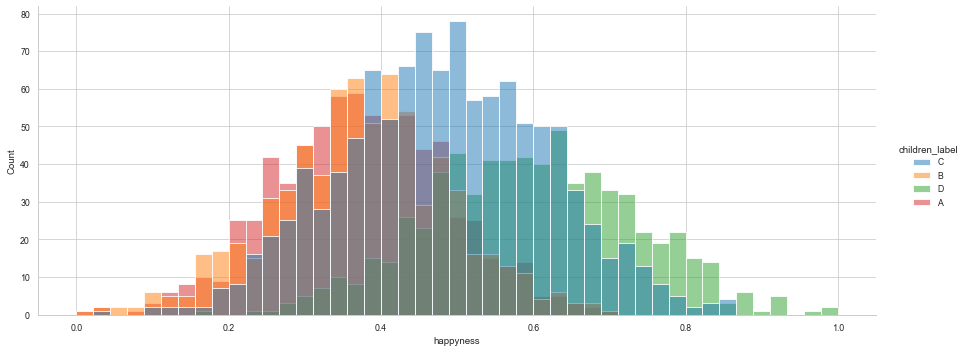

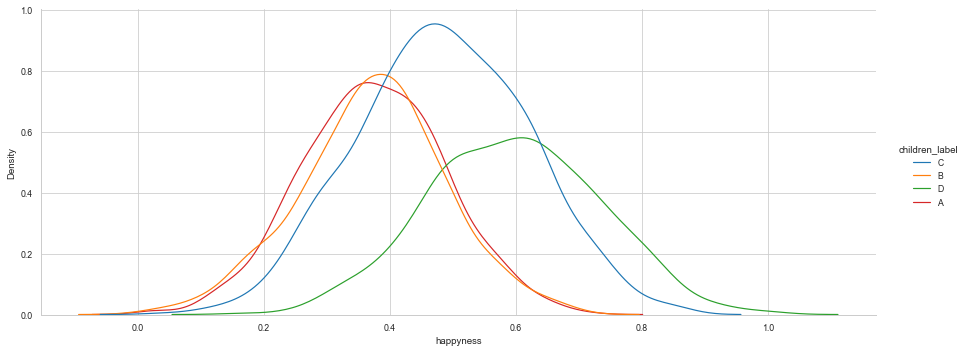

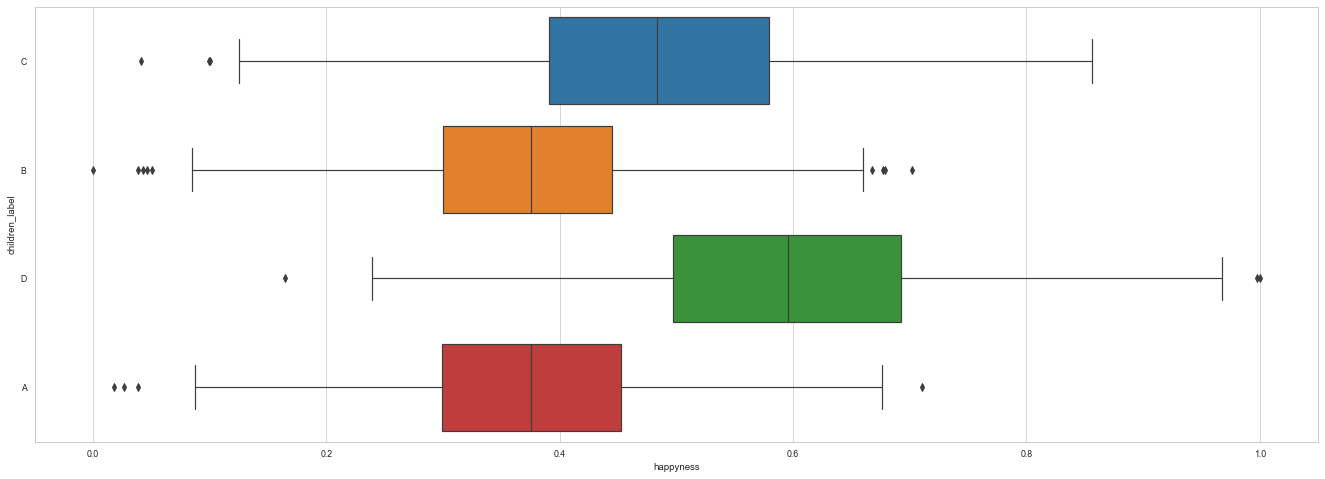

In [49]:
sns.displot(data[data.children_label.isin(choices)==True], x='happyness', hue='children_label', bins=45, height=5, aspect=2.5)
sns.displot(data[data.children_label.isin(choices)==True], x='happyness', hue='children_label', height=5, aspect=2.5, kind='kde')

plt.figure(figsize=(23, 8))
sns.boxplot(data=data[data.children_label.isin(choices)==True], x='happyness', y='children_label');

**Доход:**

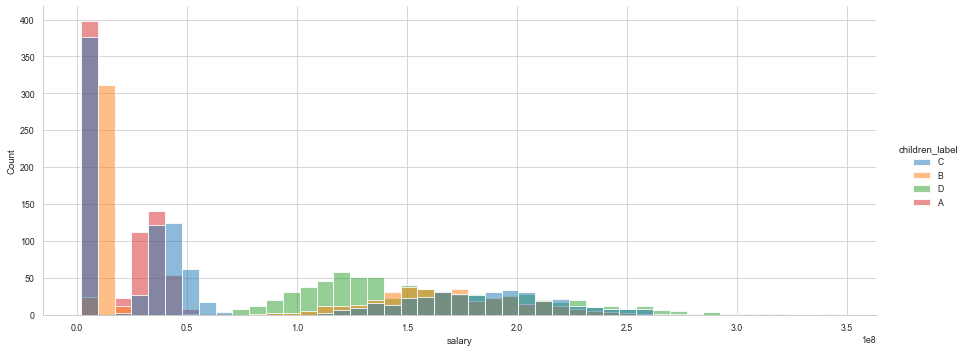

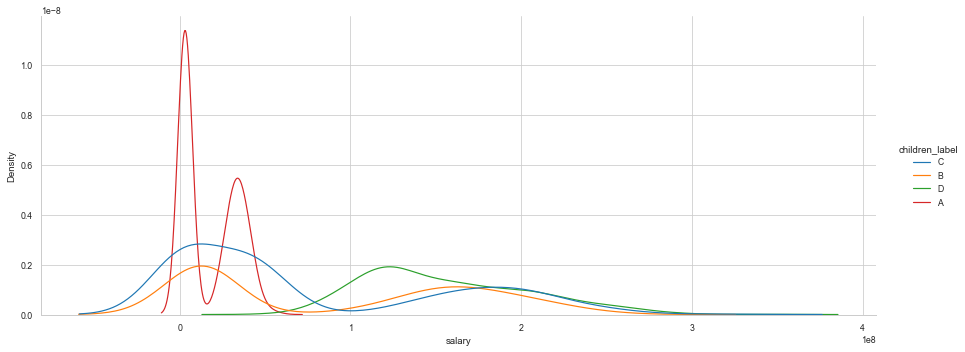

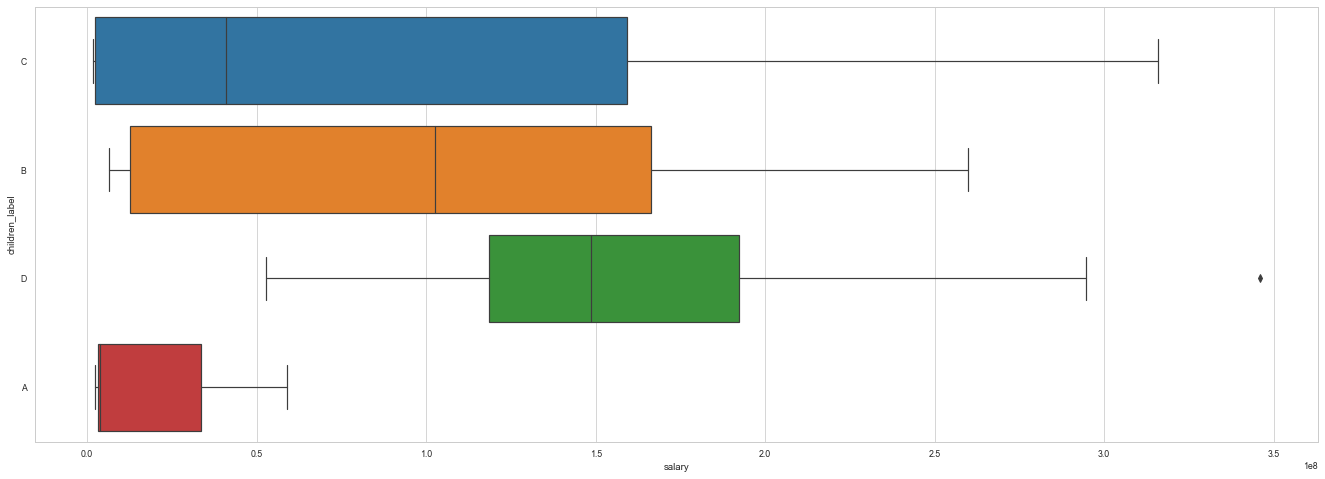

In [50]:
sns.displot(data[data.children_label.isin(choices)==True], x='salary', hue='children_label', bins=45, height=5, aspect=2.5)
sns.displot(data[data.children_label.isin(choices)==True], x='salary', hue='children_label', height=5, aspect=2.5, kind='kde')

plt.figure(figsize=(23, 8))
sns.boxplot(data=data[data.children_label.isin(choices)==True], x='salary', y='children_label');

Судя по графикам, группы существенно отличаются. Но, чтобы убедиться наверняка, проведём дисперсионный анализ и проверим критерий Крускала-Уоллиса.

**Дисперсионный анализ:**

In [46]:
# H0 – группы НЕ отличаются по уровню счастья
# H1 – группы отличаются по уровню счастья

A = data[data['children_label'] == 'A']['happyness'].values
B = data[data['children_label'] == 'B']['happyness'].values
C = data[data['children_label'] == 'C']['happyness'].values
D = data[data['children_label'] == 'D']['happyness'].values

st, p_value = stats.f_oneway(A, B, C, D)
print("statistic = {}, p-value = {}".format(st, p_value))

alpha = 0.01
if p_value > alpha:
    print('Да, гипотеза верна, группы НЕ отличаются по уровню счастья')
else:
    print('Нет, гипотеза не верна, группы отличаются по уровню счастья статистически значимо')

statistic = 499.7428380754361, p-value = 1.415486080898732e-266
Нет, гипотеза не верна, группы отличаются по уровню счастья статистически значимо


In [35]:
# H0 – группы НЕ отличаются по уровню дохода
# H1 – группы отличаются по уровню дохода

A = data[data['children_label'] == 'A']['salary'].values
B = data[data['children_label'] == 'B']['salary'].values
C = data[data['children_label'] == 'C']['salary'].values
D = data[data['children_label'] == 'D']['salary'].values

st, p_value = stats.f_oneway(A, B, C, D)
print("statistic = {}, p-value = {}".format(st, p_value))

alpha = 0.05
if p_value > alpha:
    print('Да, гипотеза верна, группы НЕ отличаются по уровню дохода')
else:
    print('Нет, гипотеза не верна, группы отличаются по уровню дохода статистически значимо')

statistic = 544.3448223097658, p-value = 4.150806789472819e-286
Нет, гипотеза не верна, группы отличаются по уровню дохода


**Критерий Крускала Уоллиса:**

In [51]:
# H0 – группы НЕ отличаются по уровню счастья
# H1 – группы отличаются по уровню счастья

A = data[data['children_label'] == 'A']['happyness'].values
B = data[data['children_label'] == 'B']['happyness'].values
C = data[data['children_label'] == 'C']['happyness'].values
D = data[data['children_label'] == 'D']['happyness'].values

st, p_value = stats.kruskal(A, B, C, D)
print("statistic = {}, p-value = {}".format(st, p_value))

alpha = 0.01
if p_value > alpha:
    print('Да, гипотеза верна, группы НЕ отличаются по уровню счастья')
else:
    print('Нет, гипотеза не верна, группы отличаются по уровню счастья статистически значимо')

statistic = 1015.1415651524203, p-value = 9.342013807282254e-220
Нет, гипотеза не верна, группы отличаются по уровню счастья статистически значимо


In [52]:
# H0 – группы НЕ отличаются по уровню дохода
# H1 – группы отличаются по уровню дохода

A = data[data['children_label'] == 'A']['salary'].values
B = data[data['children_label'] == 'B']['salary'].values
C = data[data['children_label'] == 'C']['salary'].values
D = data[data['children_label'] == 'D']['salary'].values

st, p_value = stats.kruskal(A, B, C, D)
print("statistic = {}, p-value = {}".format(st, p_value))

alpha = 0.05
if p_value > alpha:
    print('Да, гипотеза верна, группы НЕ отличаются по уровню дохода')
else:
    print('Нет, гипотеза не верна, группы отличаются по уровню дохода статистически значимо')

statistic = 938.7262707127793, p-value = 3.522506139179349e-203
Нет, гипотеза не верна, группы отличаются по уровню дохода статистически значимо


Получается, что группы отличаются и по уровню счастья, и по уровню дохода. Гипотеза не верна.